<a href="https://colab.research.google.com/github/alecsandergr/python-fundamentos-dsa/blob/main/Cap6/DSA_Cap6_Mini_Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivos da análise

1. Quais são as categorias de filmes mais comuns no IMDB?
2. Qual o número de títulos por gênero?

# Pacotes

In [1]:
!pip install -q imdb-sqlite

In [2]:
!pip install -q pycountry

     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [3]:
import re
import time
import sqlite3
import pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style = 'whitegrid')

# Carregando os dados

In [4]:
%%time
!imdb-sqlite

2022-06-15 17:50:07,573 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads/name.basics.tsv.gz
2022-06-15 17:50:12,872 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads/title.basics.tsv.gz
2022-06-15 17:50:17,178 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads/title.akas.tsv.gz
2022-06-15 17:50:24,073 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads/title.principals.tsv.gz
2022-06-15 17:50:34,553 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads/title.episode.tsv.gz
2022-06-15 17:50:36,003 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads/title.ratings.tsv.gz
2022-06-15 17:50:36,224 Populating database: imdb.db
2022-06-15 17:50:36,225 Applying schema
2022-06-15 17:50:36,229 Importing file: downloads/name.basics.tsv.gz
2022-06-15 17:50:36,230 Reading number of rows ...
2022-06-15 17:50:42,541 Inserting rows into table: people
100% 11707572/11707572 [02:04<00:00, 93680.03 rows/s]
2022-06-15 17:5

In [5]:
conn = sqlite3.connect('imdb.db')

In [6]:
tabelas = pd.read_sql_query('SELECT NAME AS "Table_Name" FROM sqlite_master \
                             WHERE type = "table"', conn)

In [7]:
tabelas

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes
5,ratings


In [8]:
tabelas = tabelas['Table_Name'].values.tolist()
tabelas

['people', 'titles', 'akas', 'crew', 'episodes', 'ratings']

In [9]:
for tabela in tabelas:
  consulta = 'PRAGMA TABLE_INFO({})'.format(tabela)
  resultado = pd.read_sql_query(consulta, conn)
  print('Esquema da tabela:', tabela)
  display(resultado)
  print('-'*100)
  print('\n')

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


----------------------------------------------------------------------------------------------------




# Perguntas

## 1 - Quais são as categorias de filmes mais comuns no IMDB?

In [10]:
consulta1 = 'SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type ORDER BY COUNT DESC'

In [11]:
resultado1 = pd.read_sql_query(consulta1, conn)

In [12]:
display(resultado1)

,type,COUNT
0,tvEpisode,6762117
1,short,874303
2,movie,612724
3,video,261683
4,tvSeries,226528
5,tvMovie,136468
6,tvMiniSeries,43819
7,tvSpecial,37325
8,videoGame,31379
9,tvShort,10573


In [13]:
resultado1['percentual'] = (resultado1['COUNT']/ resultado1['COUNT'].sum()) * 100

In [14]:
resultado1

,type,COUNT,percentual
0,tvEpisode,6762117,75.160347
1,short,874303,9.717802
2,movie,612724,6.810374
3,video,261683,2.908584
4,tvSeries,226528,2.517839
5,tvMovie,136468,1.516830
6,tvMiniSeries,43819,0.487044
7,tvSpecial,37325,0.414864
8,videoGame,31379,0.348775
9,tvShort,10573,0.117518


In [15]:
# Gráfico com apenas 4 categorias
# As três com mais títulos e outra resumindo os dados restantes

others = {}
others['type'] = 'others'
others['COUNT'] = resultado1[resultado1.index > 2].COUNT.sum()
others['percentual'] = resultado1[resultado1.index > 2].percentual.sum()

In [16]:
others

{'COUNT': 747777, 'percentual': 8.31147678189016, 'type': 'others'}

In [17]:
novo_resultado1 = resultado1[resultado1.index < 3]

In [18]:
novo_resultado1 = novo_resultado1.append(others, ignore_index=True).sort_values(by='percentual', ascending=False).reset_index(drop=True)

In [19]:
novo_resultado1

,type,COUNT,percentual
0,tvEpisode,6762117,75.160347
1,short,874303,9.717802
2,others,747777,8.311477
3,movie,612724,6.810374


### Gráfico

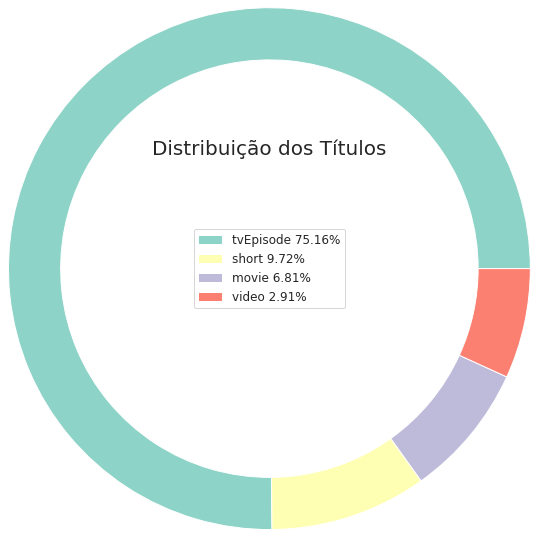

In [20]:
cs = cm.Set3(np.arange(100))
labels = [str(resultado1['type'][i])+' '+str(round(resultado1['percentual'][i],2)) +'%' for i in novo_resultado1.index]

f = plt.figure()

plt.pie(novo_resultado1['COUNT'], labeldistance=1, radius=3, colors=cs, wedgeprops = dict(width=0.6))
plt.legend(labels=labels, loc='center', prop={'size':12})
plt.title('Distribuição dos Títulos', loc='center', fontdict={'fontsize':20, 'fontweight':20})
plt.show()

## 2 - Qual o número de títulos por gênero?

In [21]:
consulta2 = '''SELECT genres, COUNT(*) AS COUNT
              FROM titles
              WHERE type = 'movie'
              GROUP BY genres
              ORDER BY COUNT DESC'''

In [22]:
resultado2 = pd.read_sql_query(consulta2, conn)

In [23]:
resultado2

,genres,COUNT
0,Drama,113413
1,Documentary,87142
2,\N,71570
3,Comedy,43671
4,Horror,15120
...,...,...
1459,"Sci-Fi,Thriller,Western",1
1460,"Short,Sport",1
1461,"Short,Thriller",1
1462,"Sport,Talk-Show",1


In [24]:
resultado2['genres'] = resultado2['genres'].str.lower().values

In [25]:
temp = resultado2['genres'].dropna()

In [26]:
padrao = '(?u)[\\w-]+'

In [27]:
vetor = CountVectorizer(token_pattern=padrao, analyzer='word').fit(temp)

In [28]:
type(vetor)

sklearn.feature_extraction.text.CountVectorizer

In [29]:
bag_generos = vetor.transform(temp)

In [30]:
type(bag_generos)

scipy.sparse.csr.csr_matrix

In [31]:
generos_unicos = vetor.get_feature_names()

In [32]:
generos = pd.DataFrame(bag_generos.todense(), columns=generos_unicos, index= temp.index)

In [33]:
generos = generos.drop(columns='n', axis=0)

In [34]:
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending=False)/generos.shape[0]

In [35]:
# Não faz sentido calcular o percentual porque a soma não será 100
# O correto é calcular um novo espaço amostral a partir da soma das categorias para cada filme, 
# depois somar o resultado de cada filme, assim teremos o espaço amostral
generos_percentual.sum()

277.1174863387978

In [36]:
generos_contador = pd.Series(generos.sum()).sort_values(ascending=False)

### Gráfico

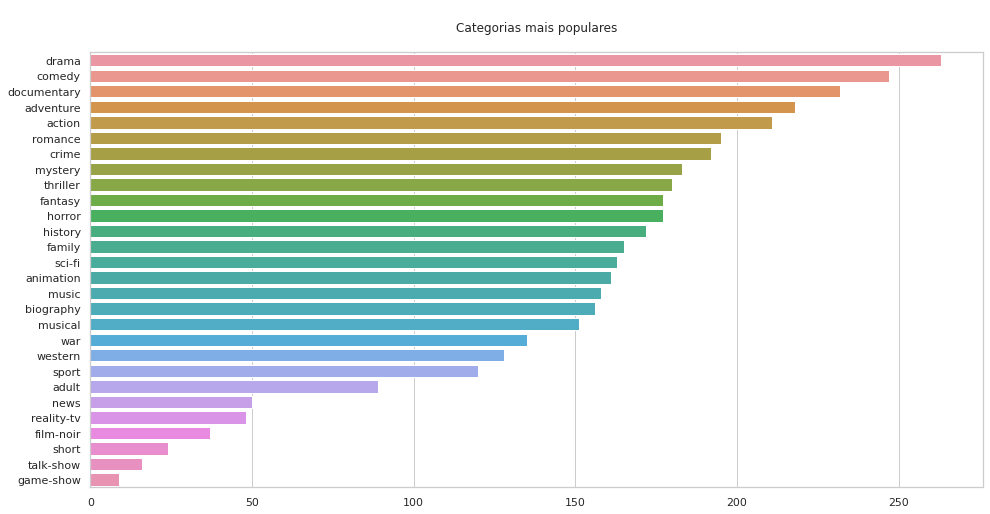

In [37]:
plt.figure(figsize=(16,8))
sns.barplot(x=generos_contador.values, y=generos_contador.index, orient='h')
plt.title('\nCategorias mais populares\n')
plt.show()

## 3 - Qual a mediana da avaliação dos filmes por gênero?

In [38]:
consulta3 = ''' SELECT genres, rating 
                FROM titles
                JOIN ratings ON ratings.title_id = titles.title_id
                WHERE type = 'movie' AND premiered <= 2022
            '''

In [39]:
resultado3 = pd.read_sql_query(consulta3, conn)

In [40]:
display(resultado3)

,genres,rating
0,\N,4.5
1,"Action,Adventure,Biography",6.0
2,Drama,4.5
3,Drama,4.5
4,Drama,3.9
...,...,...
279331,Thriller,5.8
279332,"Drama,History",6.4
279333,"Adventure,History,War",3.8
279334,Drama,8.3


In [41]:
# Função que retorna
def retorna_generos(df):
  df['genres'] = df['genres'].str.lower().values
  temp = df['genres'].dropna()
  vetor = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
  generos_unicos = vetor.get_feature_names()
  generos_unicos = [genre for genre in generos_unicos if len(genre) > 1] # exclui o gênero 'n'
  return generos_unicos

In [42]:
generos_unicos = retorna_generos(resultado3)

In [43]:
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [44]:
# Variáveis para contagem dos gêneros
generos_counts = []
generos_ratings = []

In [45]:
# item = 'drama'
# consulta_teste = ''' 
#                 SELECT COUNT(*)
#                 FROM titles
#                 JOIN ratings ON ratings.title_id = titles.title_id
#                 WHERE type = 'movie' AND premiered <= 2022 AND genres LIKE '%'''+item+"%'"
# resultado_teste = pd.read_sql_query(consulta_teste, conn)
# resultado_teste.values[0,0]

In [46]:
item = 'drama'
consulta_teste = ''' 
                SELECT premiered, COUNT(*)
                FROM titles
                WHERE type = 'movie' AND premiered <= 2022 AND genres LIKE '%{}%' 
                GROUP BY premiered
                '''
resultado_teste = pd.read_sql_query(consulta_teste.format(item), conn)
resultado_teste

,premiered,COUNT(*)
0,1903,1
1,1907,5
2,1908,2
3,1909,11
4,1910,21
...,...,...
112,2018,6198
113,2019,5953
114,2020,4700
115,2021,5575


In [47]:
item = 'drama'
consulta_teste = ''' 
                SELECT rating, premiered
                FROM titles
                JOIN ratings ON ratings.title_id = titles.title_id
                WHERE type = 'movie' AND premiered <= 2022 AND genres LIKE '%'''+item+"%'"

resultado_teste = pd.read_sql_query(consulta_teste.format(item), conn)
resultado_teste.groupby('premiered').median()

,rating
premiered,
1907,4.5
1908,4.4
1909,4.9
1910,5.3
1911,5.2
...,...
2018,6.3
2019,6.2
2020,6.2


In [48]:
# Loop
for item in generos_unicos:
  consulta = ''' 
             SELECT COUNT(*)
             FROM titles
             JOIN ratings ON ratings.title_id = titles.title_id
             WHERE type = 'movie' AND premiered <= 2022 AND genres LIKE '%'''+item+"%'"
  resultado = pd.read_sql_query(consulta, conn)
  # resultado.values[0,0]
  # resultado.iloc[0,0]
  # resultado.iloc[0][0]
  generos_counts.append(resultado['COUNT(*)'][0])

  consulta = ''' 
             SELECT rating
             FROM titles
             JOIN ratings ON ratings.title_id = titles.title_id
             WHERE type = 'movie' AND premiered <= 2022 AND genres LIKE '%'''+item+"%'"
  resultado = pd.read_sql_query(consulta, conn)
  generos_ratings.append(np.median(resultado['rating']))

In [ ]:
# Criando a tabela com a resposta
df_genero_ratings = pd.DataFrame()
df_genero_ratings['generos'] =  generos_unicos
df_genero_ratings['count'] = generos_counts
df_genero_ratings['rating'] = generos_ratings
df_genero_ratings

In [ ]:
df_genero_ratings = df_genero_ratings.sort_values('rating', ascending=False)
df_genero_ratings

### Gráfico

In [ ]:
for i in range(len(df_genero_ratings)):
  print(i)

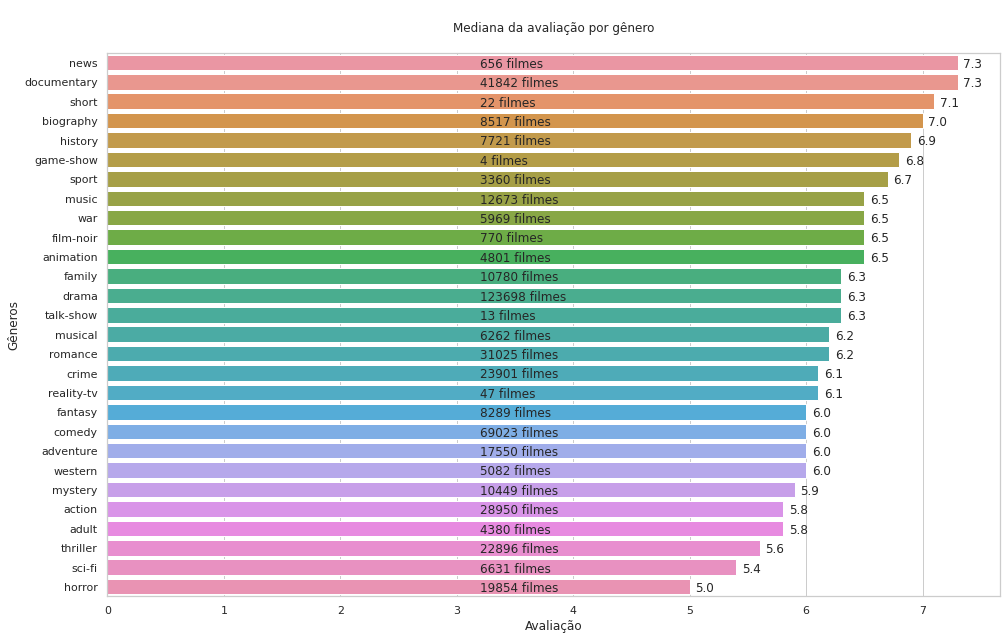

In [120]:
plt.figure(figsize=(16,10))

sns.barplot(x=df_genero_ratings.rating, y=df_genero_ratings.generos)

# Textos do gráfico
for i in range(len(df_genero_ratings)):
  plt.text(3.2, 
           i + 0.25,
           str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + ' filmes')
  plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]] + 0.05, 
           i + 0.25,
           str(round(df_genero_ratings['rating'][df_genero_ratings.index[i]],2)))

plt.title('\nMediana da avaliação por gênero\n')
plt.xlabel('Avaliação')
plt.ylabel('Gêneros')
plt.show()

## 4 - Qual a mediana de avaliação dos filmes em relação ao ano de estreia?

In [ ]:
consulta4 = '''
            SELECT rating AS Rating, premiered AS Premiered
            FROM titles
            JOIN ratings ON titles.title_id = ratings.title_id
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            '''

In [ ]:
resultado4 = pd.read_sql_query(consulta4, conn)

In [ ]:
display(resultado4)

In [ ]:
df_4 = pd.DataFrame(resultado4.groupby('Premiered')['Rating'].median())
df_4

### Gráfico

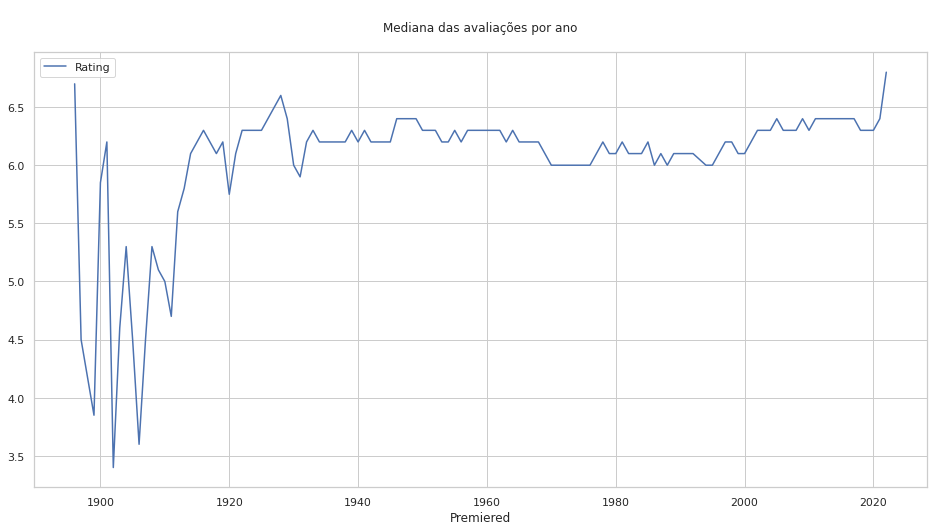

In [119]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df_4)
plt.title('\nMediana das avaliações por ano\n')
plt.show()

## 5 - Qual o número de filmes avaliados por gênero em relação ao ano de estreia?

In [ ]:
consulta5 = 'SELECT genres FROM titles'

In [ ]:
resultado5 = pd.read_sql_query(consulta5, conn)

In [ ]:
display(resultado5)

In [ ]:
generos_unicos = retorna_generos(resultado5)

Contagem dos gêneros

In [ ]:
genero_count = []
for item in generos_unicos:
  consulta = '''
             SELECT COUNT(*)
             FROM titles
             JOIN ratings ON titles.title_id = ratings.title_id
             WHERE premiered <= 2022 AND type = 'movie' AND genres LIKE '%{}%'
             '''
  resultado = pd.read_sql_query(consulta.format(item), conn)
  genero_count.append(resultado['COUNT(*)'].values[0])

In [ ]:
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['count'] = genero_count

In [117]:
df_genero_count = df_genero_count.sort_values('count', ascending=False)
top_generos = df_genero_count.head()['genre'].values
top_generos

array(['drama', 'comedy', 'documentary', 'romance', 'action'],
      dtype=object)

### Gráfico

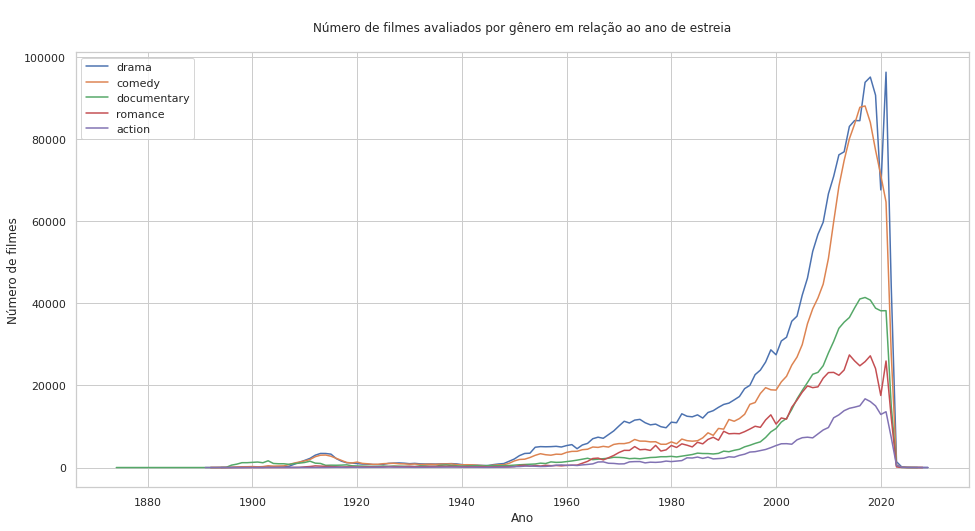

In [118]:
plt.figure(figsize=(16,8))

for item in top_generos:
  consulta = '''
             SELECT COUNT(*) Number_of_movies, premiered Year
             FROM titles
             WHERE genres LIKE '%{}%'
             GROUP BY premiered
             '''
  resultado = pd.read_sql_query(consulta.format(item), conn)
  sns.lineplot(x=resultado['Year'],y=resultado['Number_of_movies'])

plt.xlabel('Ano')
plt.ylabel('Número de filmes')
plt.title('\nNúmero de filmes avaliados por gênero em relação ao ano de estreia\n')
plt.legend(top_generos)
plt.show()

## 6 - Qual o filme com maior tempo de duração? Calcule os percentis

In [66]:
consulta6 = '''
            SELECT runtime_minutes Runtime, original_title Title
            FROM titles
            WHERE type = 'movie' AND Runtime != 'NaN'
            '''

In [ ]:
resultado6 = pd.read_sql_query(consulta6, conn)

O filme de maior duração registrado é Logistics

In [116]:
display(resultado6.sort_values('Runtime', ascending=False).head(1))

,Runtime,Title
369037,51420,Logistics


A mediana do tempo de duração é 89 minutos

In [115]:
resultado6.describe()

,Runtime
count,386082.000000
mean,89.750232
std,127.100098
min,1.000000
25%,73.000000
50%,89.000000
75%,100.000000
max,51420.000000


### Gráfico

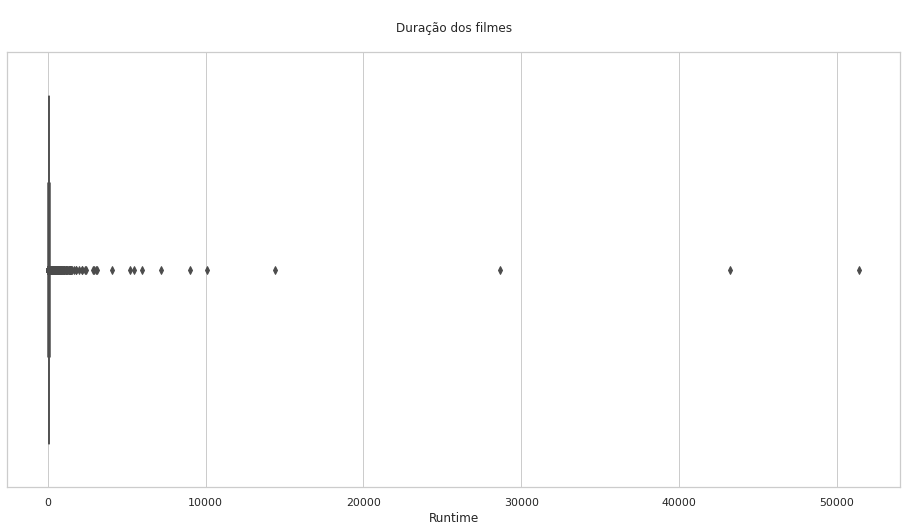

In [121]:
plt.figure(figsize=(16,8))

sns.boxplot(x=resultado6['Runtime'])

plt.title('\nDuração dos filmes\n')
plt.show()

## 7 - Qual a relação entre gênero e duração?

In [ ]:
consulta7 = '''
            SELECT genres
            FROM titles
            '''

In [ ]:
resultado7 = pd.read_sql_query(consulta7, conn)

In [ ]:
generos_unicos = retorna_generos(resultado7)

In [ ]:
genero_duration = []
for genero in generos_unicos:
  consulta = '''
             SELECT runtime_minutes duration
             FROM titles
             WHERE type = 'movie' AND genres LIKE '%{}%' AND duration != 'NaN'
             '''
  resultado = pd.read_sql_query(consulta.format(genero), conn)
  genero_duration.append(np.median(resultado['duration']))

In [ ]:
df_7 = pd.DataFrame()
df_7['genero'] = generos_unicos
df_7['duracao'] = genero_duration
df_7 = df_7.sort_values('duracao', ascending=False)

### Gráfico

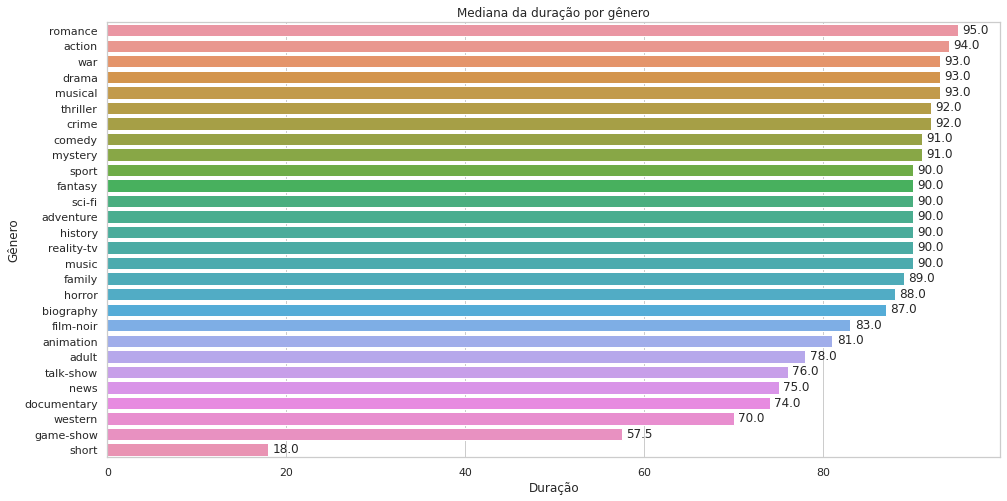

In [131]:
plt.figure(figsize=(16,8))

sns.barplot(x=df_7['duracao'], y=df_7['genero'])

for i in range(df_7.shape[0]):
  plt.text(df_7['duracao'][df_7.index[i]] + 0.5, 
           i + 0.18, 
           str(df_7['duracao'][df_7.index[i]]))

plt.xlabel('Duração')
plt.ylabel('Gênero')
plt.title('Mediana da duração por gênero')
plt.show()

## 8 - Qual o número de filmes produzidos por país?

In [ ]:
consulta8 = '''
            SELECT COUNT(*) Number_of_movies, region
            FROM titles
            JOIN akas ON titles.title_id = akas.title_id
            WHERE type = 'movie' and region != 'None'
            GROUP BY region
            ORDER BY COUNT(*) DESC
            '''

In [ ]:
resultado8 = pd.read_sql_query(consulta8, conn)

In [114]:
resultado8

,Number_of_movies,region
0,313375,US
1,160309,GB
2,91844,JP
3,89901,XWW
4,85404,FR
...,...,...
229,1,MS
230,1,NC
231,1,WS
232,1,XAU


In [ ]:
resultado8['region'].values[0]

In [ ]:
# Listas auxiliares
nomes_paises = []
contagem = []

In [ ]:
# Loop para encontrar o país de acordo com a sigla
for i in range(resultado8.shape[0]):
  try:
   coun = resultado8['region'][i]
   nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name)
   contagem.append(resultado8['Number_of_movies'][i])
  except:
    continue

In [ ]:
# Prepara o dataframe
df_8 = pd.DataFrame()
df_8['Country'] = nomes_paises
df_8['Count'] = contagem
df_8

### Gráfico

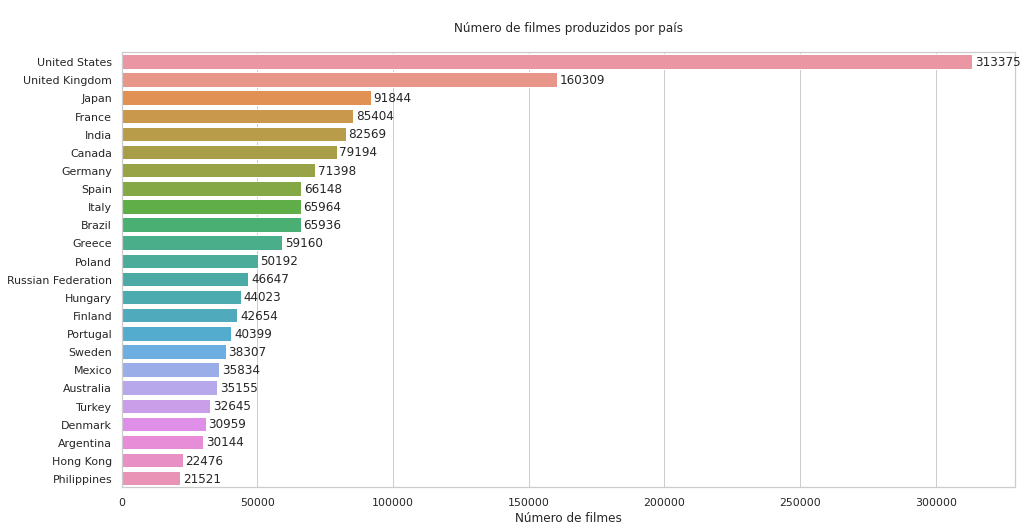

In [84]:
plt.figure(figsize=(16,8))

sns.barplot(x=df_8['Count'].head(24), y=df_8['Country'].head(24))

for i in range(df_8.head(24).shape[0]):
  plt.text(df_8['Count'][i] + 1000, 
           i + 0.2, 
           str(df_8['Count'][i]))

plt.title('\nNúmero de filmes produzidos por país\n')
plt.xlabel('Número de filmes')
plt.ylabel('')
plt.show()

## 9 - Quais são os 10 melhores filmes?

In [90]:
consulta9 = '''
            SELECT original_title title, rating, votes
            FROM titles
            JOIN ratings ON titles.title_id = ratings.title_id
            WHERE type = 'movie' AND rating != 'NaN'
            '''

In [91]:
resultado9 = pd.read_sql_query(consulta9, conn)

In [108]:
def melhores_filmes(resultado, votos = 100):
  return resultado.query('votes > @votos').sort_values(['rating', 'votes'], ascending=False).head(10)

In [109]:
melhores_filmes(resultado9, 100000)

,title,rating,votes
61154,The Shawshank Redemption,9.3,2597650
36364,The Godfather,9.2,1792999
135459,The Dark Knight,9.0,2568797
78401,The Lord of the Rings: The Return of the King,9.0,1784345
59581,Schindler's List,9.0,1321366
38277,The Godfather Part II,9.0,1236154
23388,12 Angry Men,9.0,767491
61007,Pulp Fiction,8.9,1991468
180802,Jai Bhim,8.9,190375
172785,Inception,8.8,2279344


## 10 - Quais são os 10 piores filmes?

In [106]:
consulta10 = '''
            SELECT original_title title, rating, votes
            FROM titles
            JOIN ratings ON titles.title_id = ratings.title_id
            WHERE type = 'movie' AND rating != 'NaN'
            '''

In [107]:
resultado10 = pd.read_sql_query(consulta10, conn)

In [110]:
def piores_filmes(resultado, votos = 100):
  return resultado.query('votes > @votos').sort_values(['rating', 'votes']).head(10)

In [113]:
piores_filmes(resultado10, 50000)

,title,rating,votes
252320,Reis,1.0,73289
267850,Sadak 2,1.1,94821
189809,Justin Bieber: Never Say Never,1.6,76241
161844,Disaster Movie,1.9,91145
153047,Radhe,1.9,176823
266417,Enes Batur Hayal mi Gerçek mi?,2.0,55124
121362,Son of the Mask,2.2,55987
140400,Epic Movie,2.4,105305
83640,Battlefield Earth,2.5,79941
148878,Laxmii,2.6,56901
